# Example 2: Galaxy clustering in 3d

In this example, we'll show how to calculate the two-point clustering 
of a mock galaxy catalog, $\xi_{\rm gg}(r).$ 
We'll also show how to compute cross-correlations between two different 
galaxy samples, and also the one-halo and two-halo decomposition 
$\xi^{\rm 1h}_{\rm gg}(r)$ and $\xi^{\rm 2h}_{\rm gg}(r)$. 


## Generate a mock galaxy catalog 

Let's start out by generating a mock galaxy catalog into an N-body
simulation in the usual way. Here we'll assume you have the z=0
rockstar halos for the bolshoi simulation, as this is the
default halo catalog. 


In [13]:
import numpy as np

In [14]:
from halotools.empirical_models import PrebuiltHodModelFactory
mname = 'Zheng07'
model = PrebuiltHodModelFactory(mname)

simname = 'bolshoi'
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname = simname, redshift = 0, halo_finder = 'rockstar')
model.populate_mock(halocat, Num_ptcl_requirement = 0)


Our mock galaxies are stored in the ``galaxy_table`` of ``model.mock``
in the form of an Astropy Table.


## Calculate two-point galaxy clustering $\xi_{\rm gg}(r)$

The three-dimensional galaxy clustering signal is calculated by 
the `halotools.mock_observables.tpcf` function from  
the *x, y, z* positions of the galaxies stored in the ``galaxy_table``. 
We can retrieve these arrays as follows:


In [15]:
x = model.mock.galaxy_table['x']
y = model.mock.galaxy_table['y']
z = model.mock.galaxy_table['z']


In [16]:
from halotools.mock_observables import return_xyz_formatted_array

#sample_mask = model.mock.galaxy_table['stellar_mass'] > 1e10
pos = return_xyz_formatted_array(x, y, z)


Now we'll use the `pos` as input to the `tpcf` function to calculate the clustering

In [17]:
from halotools.mock_observables import tpcf

rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:] + rbins[:-1])/2.

xi_all = tpcf(pos, rbins, period = model.mock.Lbox, num_threads = 'max',
             max_sample_size = 1e5)



In [18]:
np.savetxt('%s_%s.npy'%(mname, simname), xi_all)

### Decomposition into the 1-halo and 2-halo terms

The ``tpcf_one_two_halo_decomp`` function calculates the two-point
correlation function, decomposed into contributions from galaxies in the
same halo, and galaxies in different halos. In order to use this
function, we must provide an input array of host halo IDs that are equal
for galaxies occupying the same halo, and distinct for galaxies in
different halos. We'll use the ``halo_hostid`` column for this purpose,
using the same ``sample_mask`` as above. 


### Plot the results

In [19]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [20]:
rad = [0.1 , 0.11 , 0.121 , 0.1331 , 0.14641 , 0.161051 , 0.1771561 , 0.1948717 , 
       0.2143589 , 0.2357948 , 0.2593742 , 0.2853117 , 0.3138428 , 0.3452271 , 
       0.3797498 , 0.4177248 , 0.4594973 , 0.505447 , 0.5559917 , 0.6115909 , 
       0.67275 , 0.740025 , 0.8140275 , 0.8954302 , 0.9849733 , 1.083471 , 
       1.191818 , 1.310999 , 1.442099 , 1.586309 , 1.74494 , 1.919434 , 
       2.111378 , 2.322515 , 2.554767 , 2.810244 , 3.091268 , 3.400395 , 3.740434 , 
       4.114478 , 4.525926 , 4.978518 , 5.47637 , 6.024007 , 6.626408 , 7.289048 , 
       8.017953 , 8.819749 , 9.701723 , 10.6719 , 11.73909 , 12.91299 , 14.20429 , 
       15.62472 , 17.18719 , 18.90591 ]

pred = [  1382.368 , 1129.538 , 986.9986 , 851.1019 , 717.0826 , 639.7202 , 
        527.4941 , 453.8385 , 386.7211 , 340.2145 , 290.112 , 240.7943 , 
        204.3657 , 172.0202 , 139.8982 , 118.6608 , 96.73241 , 80.00885 , 
        64.41724 , 52.83373 , 42.93001 , 34.7438 , 28.24397 , 22.74163 , 
        17.84051 , 14.29683 , 10.96245 , 8.893947 , 6.877745 , 5.641498 , 
        4.644286 , 3.891761 , 3.281785 , 2.829337 , 2.484321 , 2.127375 , 
        1.872916 , 1.665345 , 1.50619 , 1.291889 , 1.115184 , 0.9942574 , 
        0.8640238 , 0.744204 , 0.6320062 , 0.5616723 , 0.4574047 , 0.3874903 , 
        0.3360941 , 0.2775894 , 0.2239145 , 0.1853233 , 0.1480827 , 0.1201037 , 
        0.09438282 , 0.0739837]

In [21]:
print xi_all[0]

1450.69592957


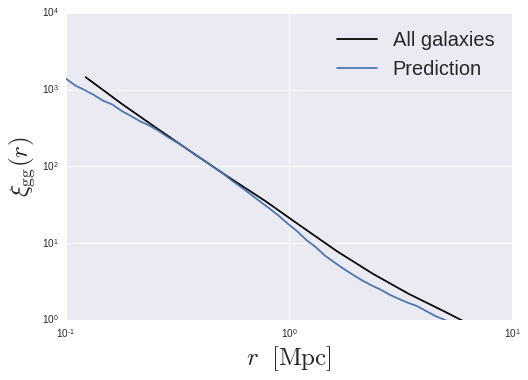

In [22]:
#from seaborn import plt

plt.plot(rbin_centers, xi_all, 
         label='All galaxies', color='k')

plt.plot(rad, pred,  label = 'Prediction')
#plt.plot(rbin_centers, xi_1h, 
#         label = '1-halo term')
#plt.plot(rbin_centers, xi_2h, 
#         label = '2-halo term')

plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)


In [23]:
print xi_all

[  1.45069593e+03   6.54743480e+02   3.09255715e+02   1.47794000e+02
   7.13437973e+01   3.54736161e+01   1.66098431e+01   7.84659711e+00
   3.98726430e+00   2.18166973e+00   1.28262105e+00   7.41552452e-01
   3.96816177e-01   2.05153948e-01]


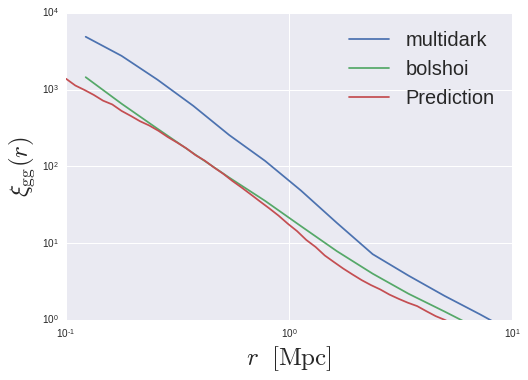

In [26]:
for simname in ['multidark', 'bolshoi']:#, 'bolplanck', 'consuelo']:
    xi_all = np.loadtxt('%s_%s.npy'%(mname, simname) )
    plt.plot(rbin_centers, xi_all, 
             label=simname)

plt.plot(rad, pred,  label = 'Prediction')
#plt.plot(rbin_centers, xi_1h, 
#         label = '1-halo term')
#plt.plot(rbin_centers, xi_2h, 
#         label = '2-halo term')

plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)